# Task 6 - Collider Bias in a Hypothetical Study on Stress, Smoking and Heart Disease

## Example
### Scenario
Inspect the effect a collider can have on the relationship between variables if it is conditioned upon. The example here looks at the relationship between Stress, Smoking, Heart Disease and a fourth unobserved variable. 

### Steps 
1. Causal Relationships definition for DAG:
* Unobserved confounder increases likelihood of smoking and heart disease
* Stress increases the likelihood of smoking
* Stress and smoking increase the risk of heart disease
2. Hypothetical Data Creation
3. Visualize Data
4. Contingency Table

### Variables
* Stress: Binary, 1 - high stress and 0 - low stress
* Smoking: Binary, 1 - smoker and 0 - non-smoker
* Heart Disease: Binary, 1 - heart disease and 0 - no heart disease
* Outside Factor: Binary, 2 - present and 0 - not present

### Basic Formulas
1. Chi2-Test:
* X^2 = ∑ (Oi - Ei)^2 / Ei
* X^2: Chi-square statistic, Oi: Observed frequency, Ei: Expected frequency

In [68]:
# Imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from scipy.stats import chi2_contingency

In [69]:
# Hypothetical Data Creation
np.random.seed(73)
data_size = 1000

# P(stress)
stress = np.random.binomial(1, 0.6, data_size)

# P(outside_factor) 60% chance of outside factor that influences both smoking and heart disease probability
outside_factor= np.random.binomial(1, 0.6, data_size)

# P(smoking | stress, outside_factor)
logit_smoking = -1 + 1.5 * stress + 3 * outside_factor
p_smoking = 1 / (1 + np.exp(-logit_smoking))
smoking = np.random.binomial(1, p_smoking, data_size) 

# P(heart disease | smoking, stress, outside_factor)
logit_heart_disease = -1 + 3 * smoking + 1.5 * stress + 2 * outside_factor
p_heart_disease = 1 / (1 + np.exp(-logit_heart_disease))
heart_disease = np.random.binomial(1, p_heart_disease, data_size)

data = pd.DataFrame({'stress': stress, 'smoking': smoking, 'heart_disease': heart_disease, 'outside_factor': outside_factor})
controlled_data_1 = data[data['smoking'] == 1]
controlled_data_0 = data[data['smoking'] == 0]


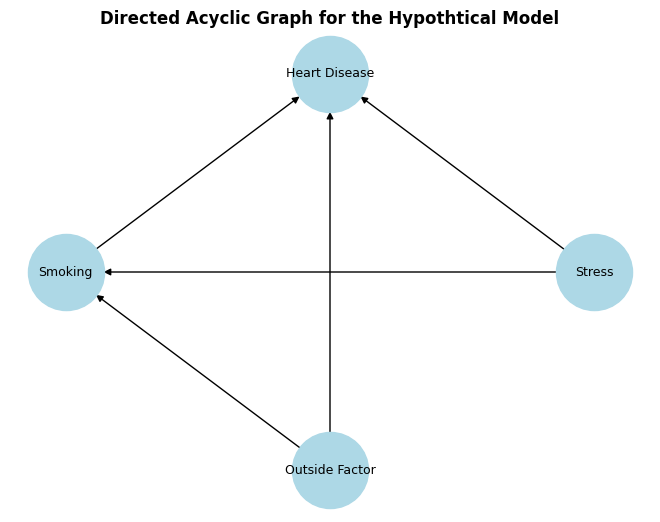

In [70]:
# DAG Visualization
dag = nx.DiGraph()
dag.add_edges_from([('Stress', 'Heart Disease'), ('Smoking', 'Heart Disease'), ('Stress', 'Smoking'), ('Outside Factor', 'Smoking'), ('Outside Factor', 'Heart Disease') ])
pos = nx.circular_layout(dag)
nx.draw(dag, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=9)
plt.title('Directed Acyclic Graph for the Hypothtical Model', fontweight='bold')
plt.show()

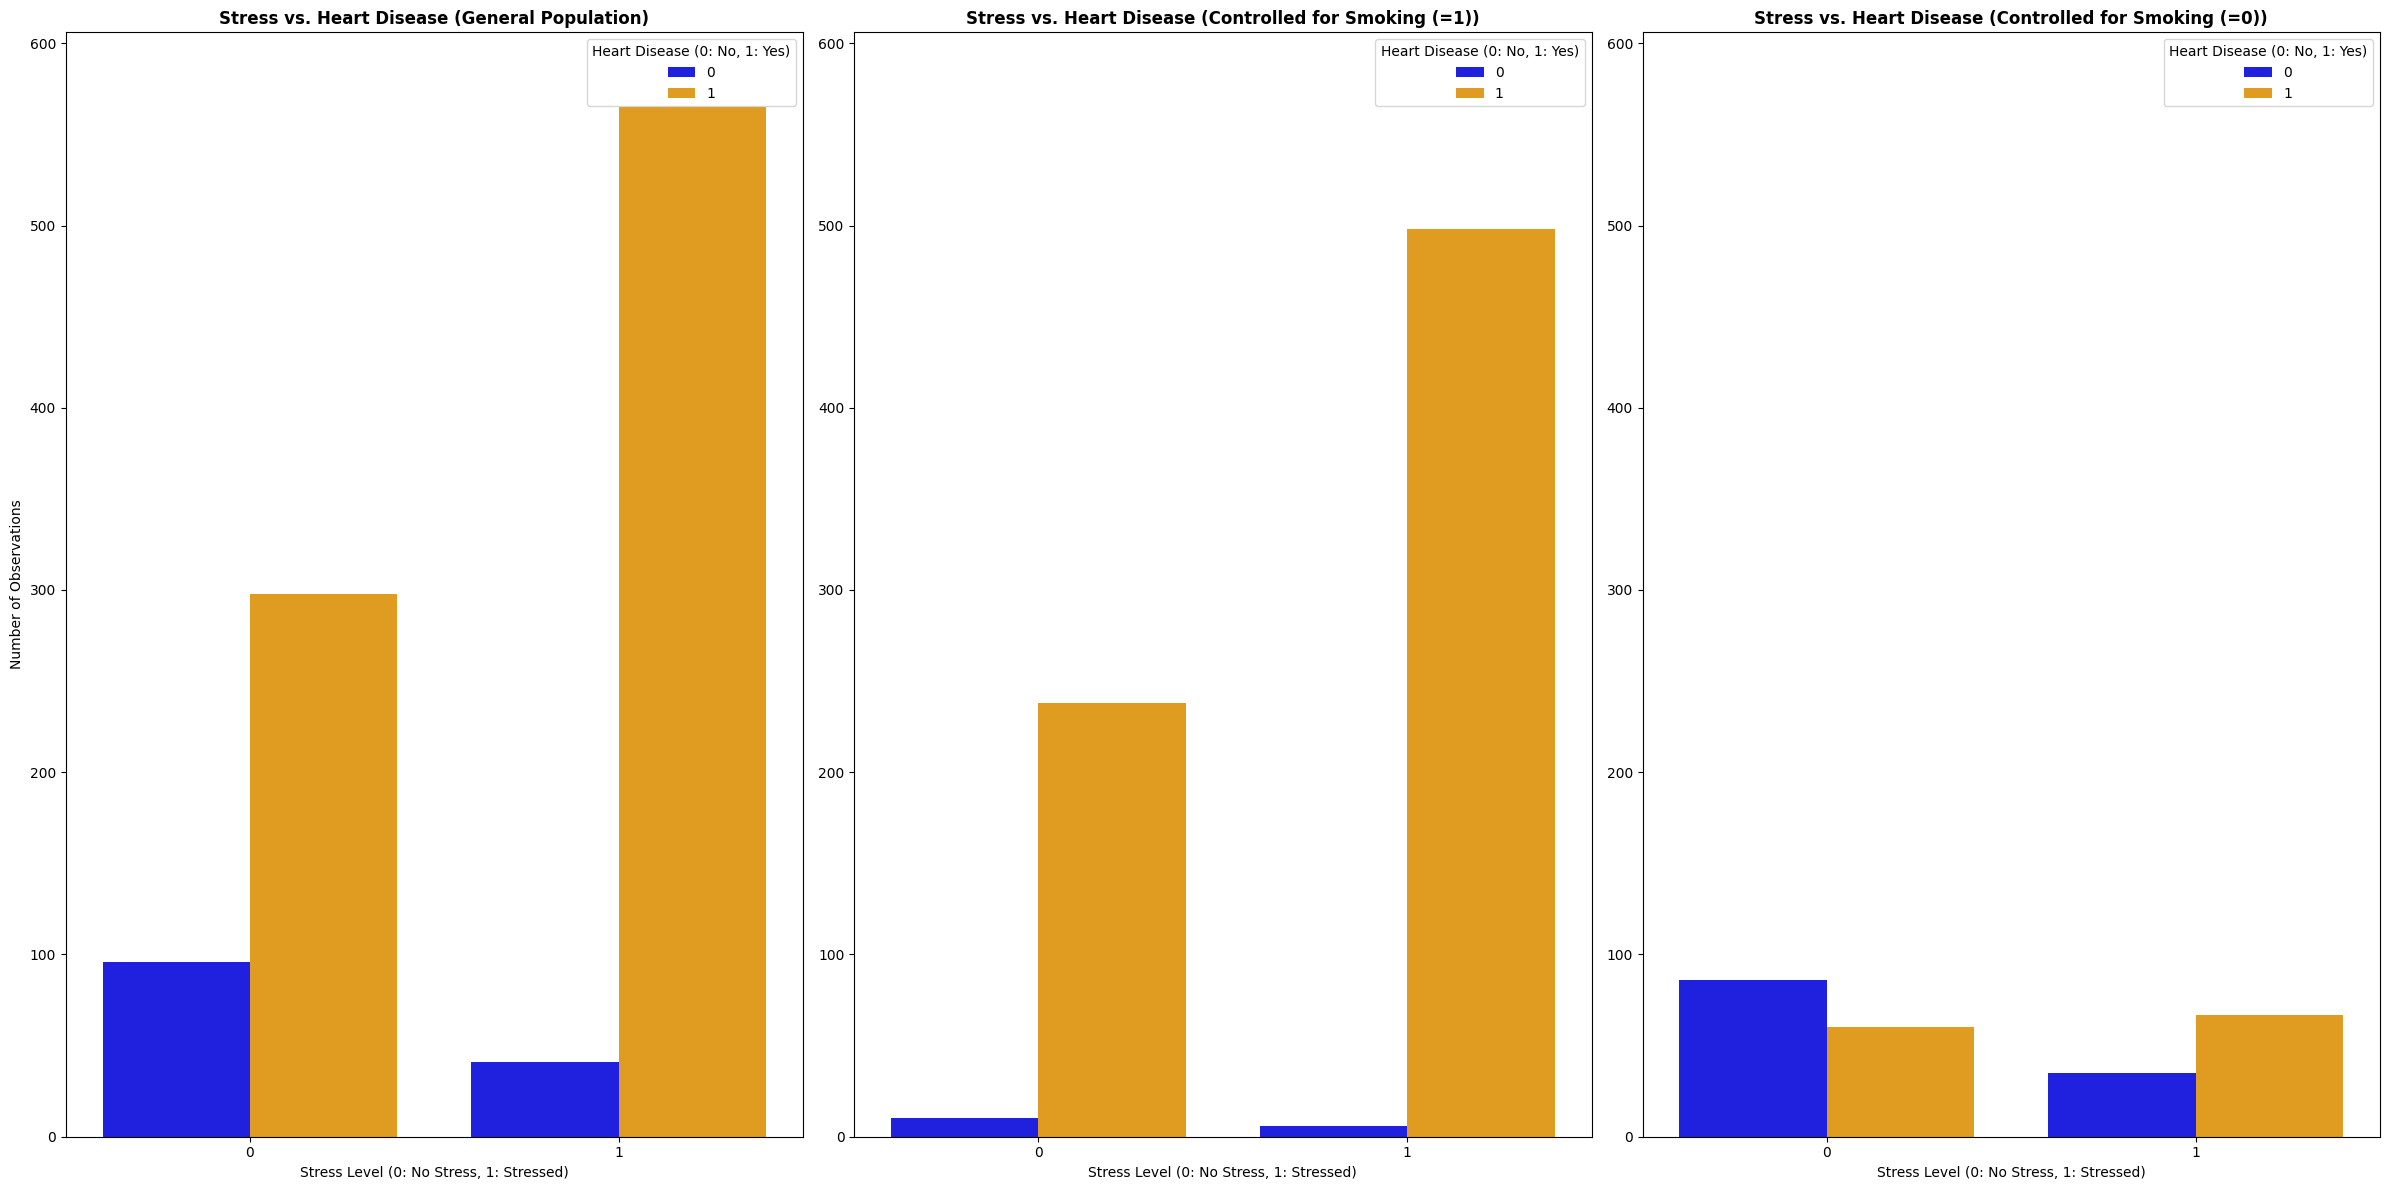

In [71]:
# Visualize Relationships Before Controlling for Heart Disease
max_count = max(data['stress'].value_counts().max(), controlled_data_1['stress'].value_counts().max(), controlled_data_0['stress'].value_counts().max())

plt.figure(figsize=(24, 12))

plt.subplot(1, 3, 1)
sns.countplot(x='stress', hue='heart_disease', data=data, palette=['blue', 'orange'])
plt.title('Stress vs. Heart Disease (General Population)', fontweight='bold')
plt.xlabel('Stress Level (0: No Stress, 1: Stressed)')
plt.ylabel('Number of Observations')
plt.ylim(0, max_count)
plt.legend(title='Heart Disease (0: No, 1: Yes)')

# Visualize Relationships After Controlling for Smoking (Only Smokers)
plt.subplot(1, 3, 2)
sns.countplot(x='stress', hue='heart_disease', data=controlled_data_1, palette=['blue', 'orange'])
plt.title('Stress vs. Heart Disease (Controlled for Smoking (=1))', fontweight='bold')
plt.ylim(0, max_count)
plt.ylabel('')
plt.xlabel('Stress Level (0: No Stress, 1: Stressed)')

plt.legend(title='Heart Disease (0: No, 1: Yes)')

# Visualize Relationships After Controlling for Smoking (Only Non Smokers)
plt.subplot(1, 3, 3)
sns.countplot(x='stress', hue='heart_disease', data=controlled_data_0, palette=['blue', 'orange'])
plt.title('Stress vs. Heart Disease (Controlled for Smoking (=0))', fontweight='bold')
plt.ylim(0, max_count)
plt.ylabel('')
plt.xlabel('Stress Level (0: No Stress, 1: Stressed)')
plt.legend(title='Heart Disease (0: No, 1: Yes)')

plt.tight_layout()
plt.show()

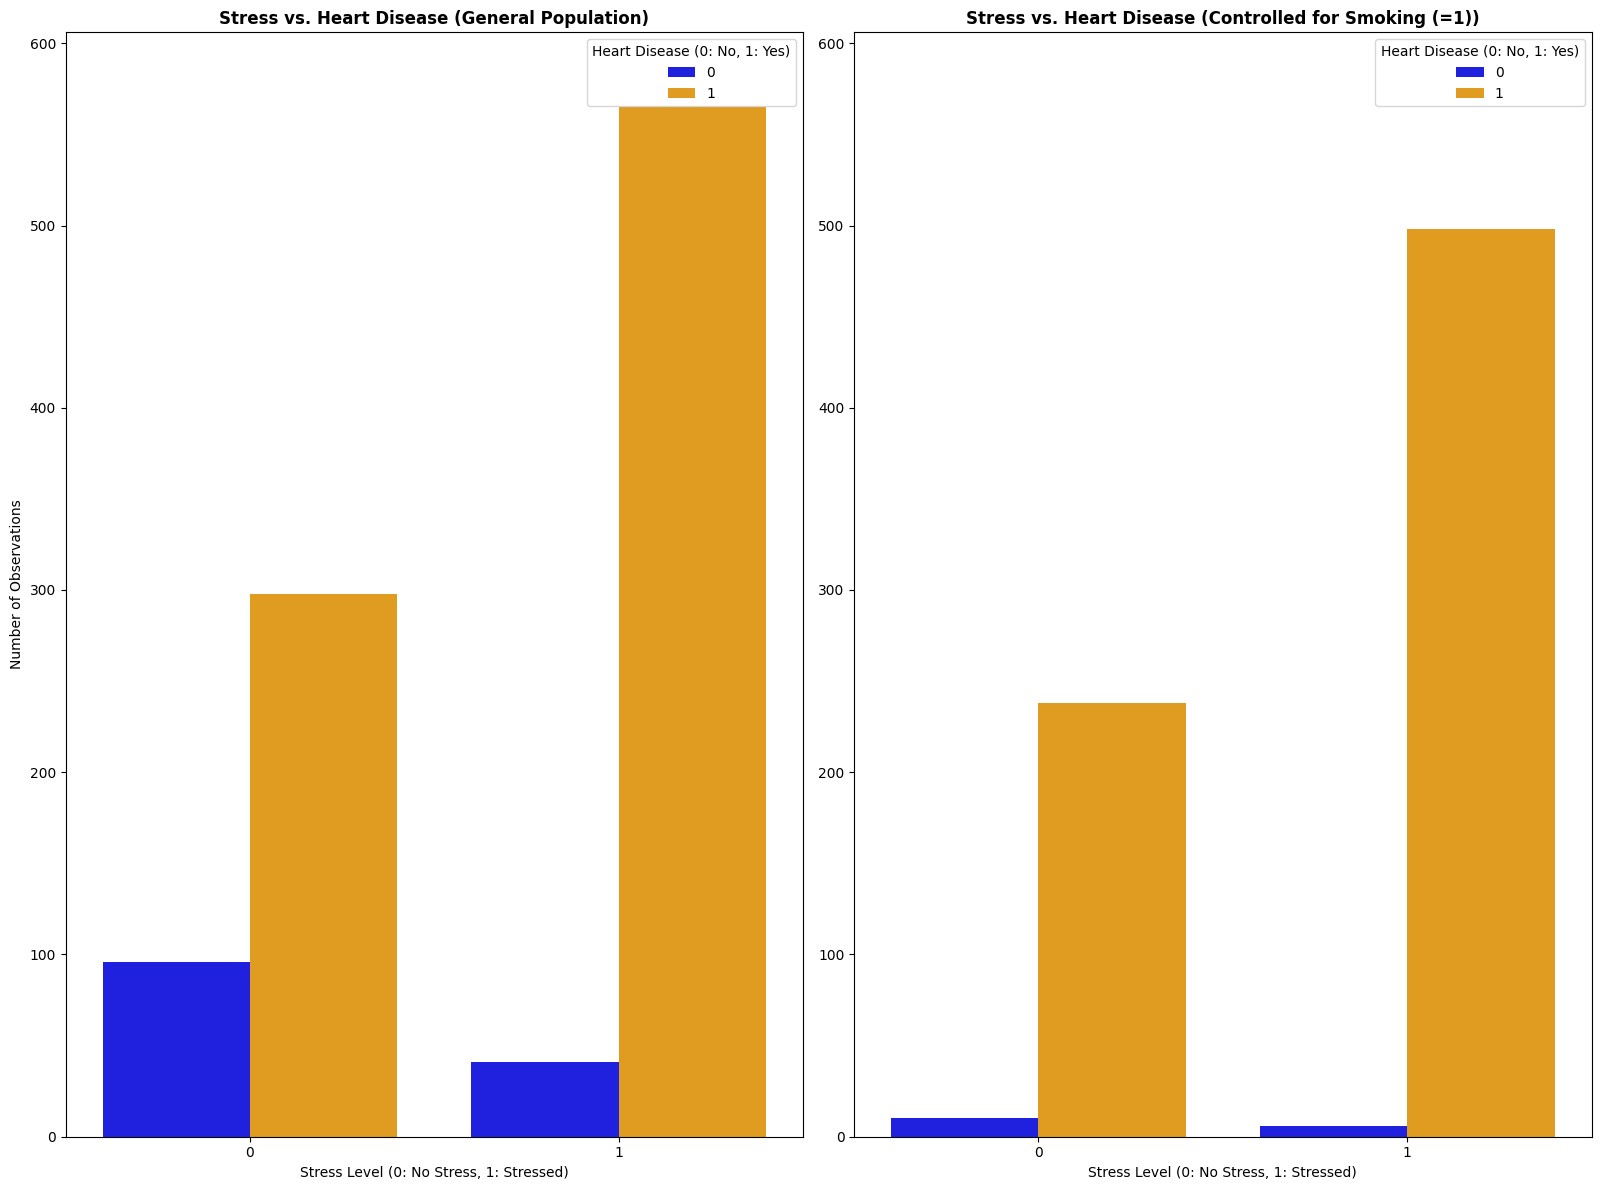

In [74]:
# Visualize Relationships Before Controlling for Heart Disease
max_count = max(data['stress'].value_counts().max(), controlled_data_1['stress'].value_counts().max(), controlled_data_0['stress'].value_counts().max())

plt.figure(figsize=(24, 12))

plt.subplot(1, 3, 1)
sns.countplot(x='stress', hue='heart_disease', data=data, palette=['blue', 'orange'])
plt.title('Stress vs. Heart Disease (General Population)', fontweight='bold')
plt.xlabel('Stress Level (0: No Stress, 1: Stressed)')
plt.ylabel('Number of Observations')
plt.ylim(0, max_count)
plt.legend(title='Heart Disease (0: No, 1: Yes)')

# Visualize Relationships After Controlling for Smoking (Only Smokers)
plt.subplot(1, 3, 2)
sns.countplot(x='stress', hue='heart_disease', data=controlled_data_1, palette=['blue', 'orange'])
plt.title('Stress vs. Heart Disease (Controlled for Smoking (=1))', fontweight='bold')
plt.ylim(0, max_count)
plt.ylabel('')
plt.xlabel('Stress Level (0: No Stress, 1: Stressed)')

plt.legend(title='Heart Disease (0: No, 1: Yes)')

plt.tight_layout()
plt.show()

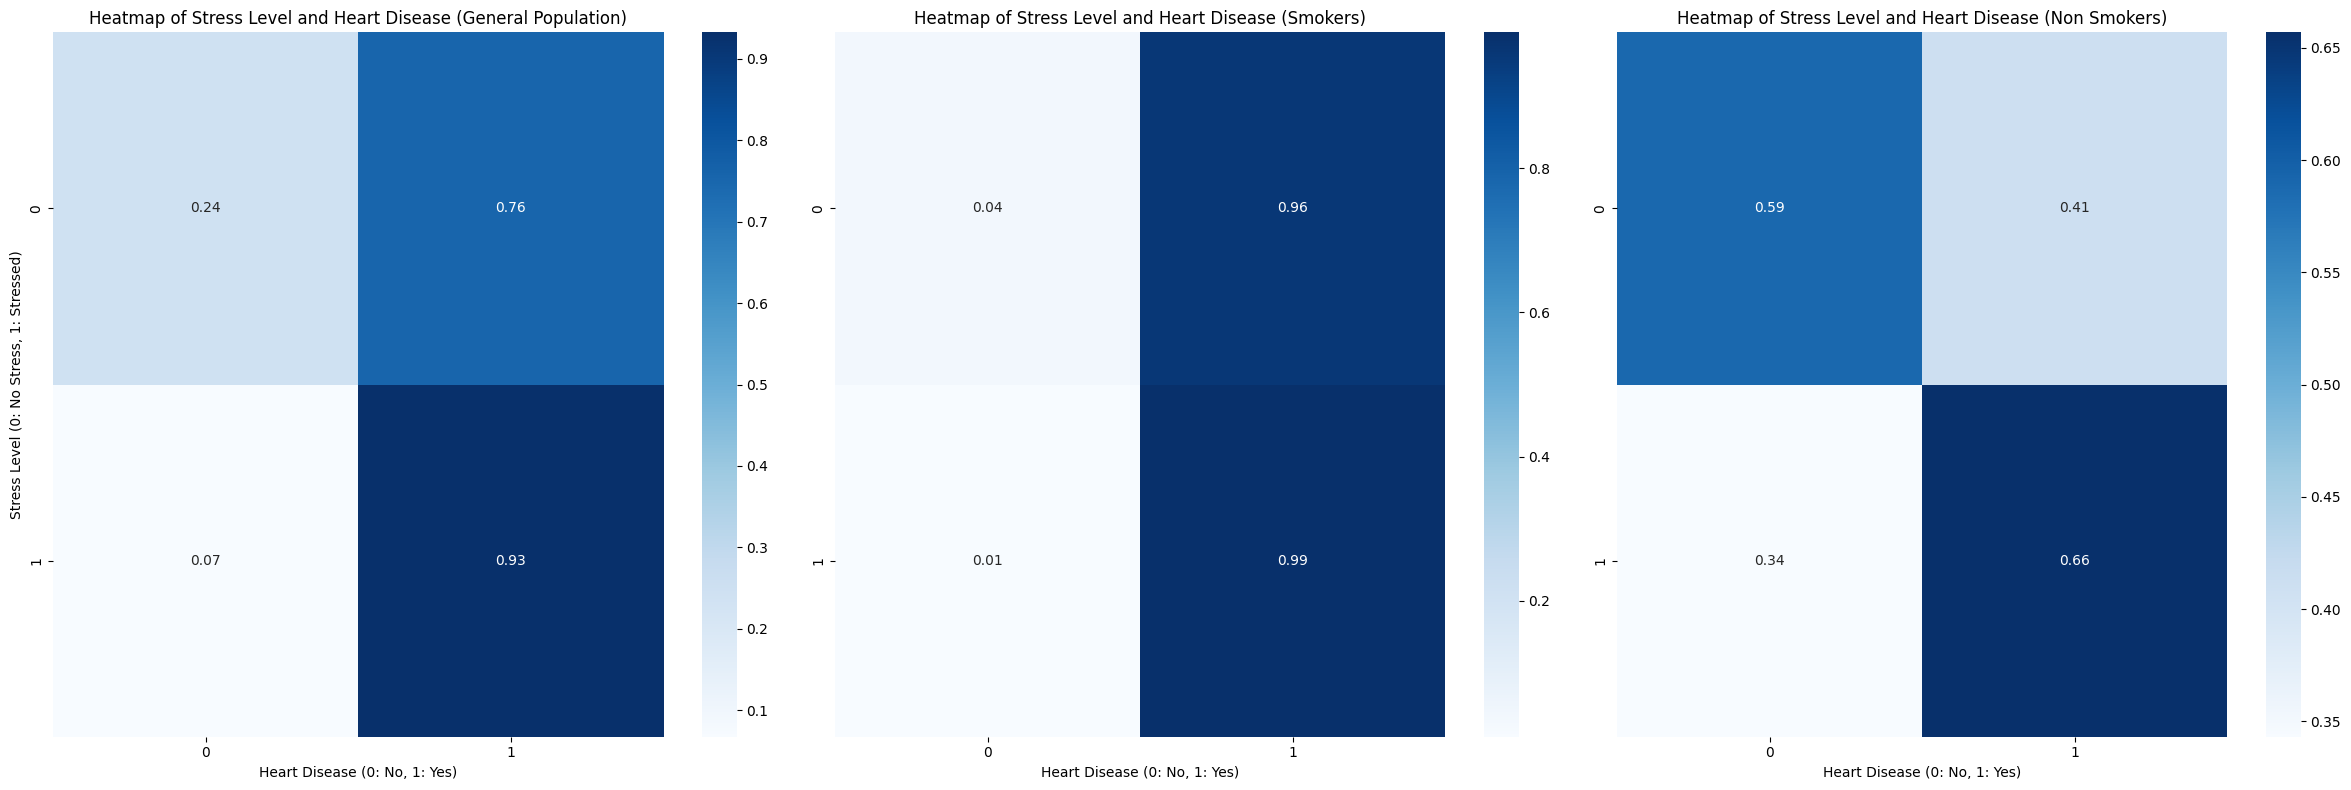

In [72]:
# Create a crosstab of stress level and heart disease
heatmap_data = pd.crosstab(data['stress'], data['heart_disease'],  normalize='index')
heatmap_data_controlled_1 = pd.crosstab(controlled_data_1['stress'], controlled_data_1['heart_disease'],  normalize='index')
heatmap_data_controlled_0 = pd.crosstab(controlled_data_0['stress'], controlled_data_0['heart_disease'],  normalize='index')

# Plot the heatmap
plt.figure(figsize=(24, 8))

plt.subplot(1, 3, 1)
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='Blues')
plt.title('Heatmap of Stress Level and Heart Disease (General Population)')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Stress Level (0: No Stress, 1: Stressed)')


plt.subplot(1, 3, 2)
sns.heatmap(heatmap_data_controlled_1, annot=True, fmt='.2f', cmap='Blues')
plt.title('Heatmap of Stress Level and Heart Disease (Smokers)')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('')


plt.subplot(1, 3, 3)
sns.heatmap(heatmap_data_controlled_0, annot=True, fmt='.2f', cmap='Blues')
plt.title('Heatmap of Stress Level and Heart Disease (Non Smokers)')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('')

plt.tight_layout()
plt.show()

### Interpretation of Visualization
 When only looking at smokers’ case relatively more individuals have heart disease, but not all these cases can be attributed to stressg alone, we have opened a backdoor path to the outside factor which influences smokers as well as heart disease. For non-smokers, the outside factor is less likely to appear, which contributes to the relatively lower amount of people with heart disease for both stressed and non-stressed individuals.

In [73]:
contingency_table = pd.crosstab(data['stress'], data['heart_disease'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
correlation = np.corrcoef(data['stress'], data['heart_disease'])[0, 1]
print('Contingency Table (Before Controlling for Smoking):\n', contingency_table)
print(f'Chi-square Test Statistic: {chi2}, p-value: {p}, Correlation: {correlation}')

contingency_table_controlled_1 = pd.crosstab(controlled_data_1['stress'], controlled_data_1['heart_disease'])
chi2, p, dof, expected = chi2_contingency(contingency_table_controlled_1)
correlation = np.corrcoef(controlled_data_1['stress'], controlled_data_1['heart_disease'])[0, 1]
print('\nContingency Table (After Controlling for Smoking(=1)):\n', contingency_table_controlled_1)
print(f'Chi-square Test Statistic: {chi2}, p-value: {p}, Correlation: {correlation}')

contingency_table_controlled_0 = pd.crosstab(controlled_data_0['stress'], controlled_data_0['heart_disease'])
chi2, p, dof, expected = chi2_contingency(contingency_table_controlled_0)
correlation = np.corrcoef(controlled_data_0['stress'], controlled_data_0['heart_disease'])[0, 1]
print('\nContingency Table (After Controlling for Smoking(=0)):\n', contingency_table_controlled_0)
print(f'Chi-square Test Statistic: {chi2}, p-value: {p}, Correlation: {correlation}')

Contingency Table (Before Controlling for Smoking):
 heart_disease   0    1
stress                
0              96  298
1              41  565
Chi-square Test Statistic: 61.073993616427806, p-value: 5.496948983921007e-15, Correlation: 0.25010744173821264

Contingency Table (After Controlling for Smoking(=1)):
 heart_disease   0    1
stress                
0              10  238
1               6  498
Chi-square Test Statistic: 5.153458864845612, p-value: 0.023200115452668996, Correlation: 0.09258336255634708

Contingency Table (After Controlling for Smoking(=0)):
 heart_disease   0   1
stress               
0              86  60
1              35  67
Chi-square Test Statistic: 13.565169325431471, p-value: 0.00023042162722101603, Correlation: 0.24207351734237742


## Interpretation of Results
1. General Population:
* Chi-square Test Statistic: 61.07
* p-value: 5.49e-15
* Correlation: 0.25
* Inference: Strong, significant positive relationship between stress and heart disease.
* Explanation: Reflects the true causal relationship.
2. Controlled for Smoking (smokers):
* Chi-square Test Statistic: 5.15
* p-value: 0.02
* Correlation: 0.09
* Inference: Weaker relationship (-> due to collider bias).
* Explanation: Controlling for smoking inadvertedly matches those who smoke due to stress with those who smoke due to other factors (outside factor). As this outside factor also influences heart disease it makes sense that (as shown in the visuals) there are more people with heart disease and simultaneously the correlation between stress and heart disease decreases as the more prevalent presence of the outside factor now influences heart disease stronger.
3. Controlled for Smoking (non smokers):
* Chi-square Test Statistic: 13.56
* p-value: 0.0002
* Correlation: 0.242
* Inference: Weaker relationship (-> due to collider bias).
* Explanation: Controlling for non-smoking has the reverse effect. There are now less people with the outside factor that also influences heart disease, therefore the effect stress has increases again to alsmost the same correlation value as in the general population, while the visualizations show relativly less people with heart disease.
